In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
pd.set_option('display.max_columns', 100)

from sklearn import preprocessing

#Untuk Fitur Seleksi
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Untuk Modeling
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Dataset

In [ ]:
df = pd.read_csv("drive/My Drive/dataset_rakamin/loan_data_2007_2014.csv", delimiter = ",")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# melihat kolom
col_name = df.columns.tolist()
col_name

['Unnamed: 0',
 'id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_a

# Data Exploration

In [ ]:
df.shape

(466285, 75)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
#Menghapus kolom Unnamed: 0 karena tidak diperlukan

df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [ ]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Visualisai Data

In [ ]:
# Untuk melihat frekuensi dari variabel loan_status
print(df['loan_status'].value_counts())

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64


Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64


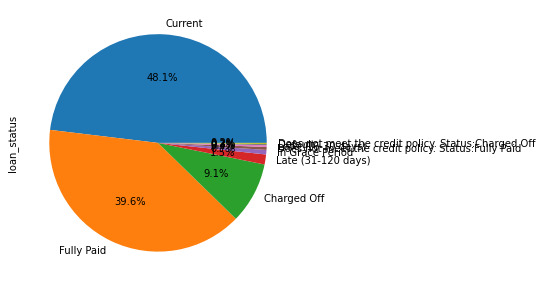

In [ ]:
# Untuk melihat proporsi dari variabel loan_status
print(df['loan_status'].value_counts(normalize=True) * 100)
df['loan_status'].value_counts().plot.pie(autopct="%1.1f%%", figsize=(10,5))

In [ ]:
# Untuk melihat frekuensi dari variabel home_ownership
print(df['home_ownership'].value_counts())

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


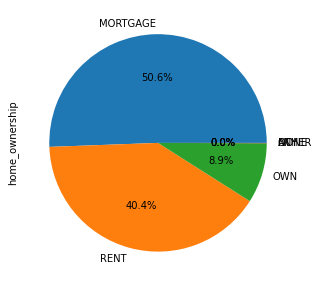

In [ ]:
# Untuk melihat proporsi dari variabel home_ownership
print(df['home_ownership'].value_counts(normalize=True) * 100)
df['home_ownership'].value_counts().plot.pie(autopct="%1.1f%%", figsize=(10,5))

In [ ]:
# Untuk melihat frekuensi dari variabel grade
print(df['grade'].value_counts())

B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64


B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


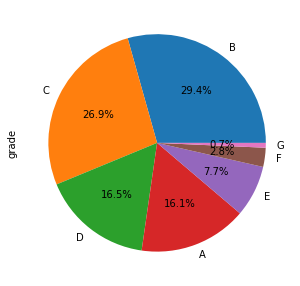

In [ ]:
# Untuk melihat proporsi dari variabel grade
print(df['grade'].value_counts(normalize=True) * 100)
df['grade'].value_counts().plot.pie(autopct="%1.1f%%", figsize=(10,5))

In [ ]:
# Untuk melihat frekuensi dari variabel term
print(df['term'].value_counts())

 36 months    337953
 60 months    128332
Name: term, dtype: int64


 36 months    72.477776
 60 months    27.522224
Name: term, dtype: float64


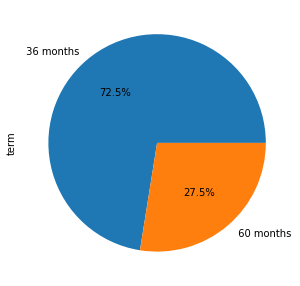

In [ ]:
# Untuk melihat proporsi dari variabel term
print(df['term'].value_counts(normalize=True) * 100)
df['term'].value_counts().plot.pie(autopct="%1.1f%%", figsize=(10,5))

In [ ]:
# Untuk melihat frekuensi dari variabel verification_status
print(df['verification_status'].value_counts())

Verified           168055
Source Verified    149993
Not Verified       148237
Name: verification_status, dtype: int64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


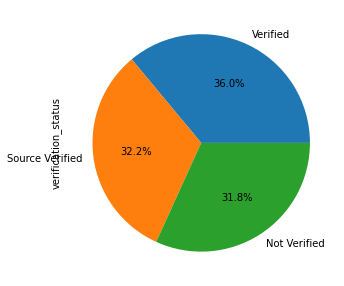

In [ ]:
# Untuk melihat proporsi dari variabel verification_status
print(df['verification_status'].value_counts(normalize=True) * 100)
df['verification_status'].value_counts().plot.pie(autopct="%1.1f%%", figsize=(10,5))

loan_status     Charged Off  Current  Default  \
home_ownership                                  
ANY                       0        0        0   
MORTGAGE              18799   117038      351   
NONE                      7        2        0   
OTHER                    27        3        0   
OWN                    3736    21272       69   
RENT                  19906    85911      412   

loan_status     Does not meet the credit policy. Status:Charged Off  \
home_ownership                                                        
ANY                                                             0     
MORTGAGE                                                      348     
NONE                                                            1     
OTHER                                                          11     
OWN                                                            49     
RENT                                                          352     

loan_status     Does not meet the cred

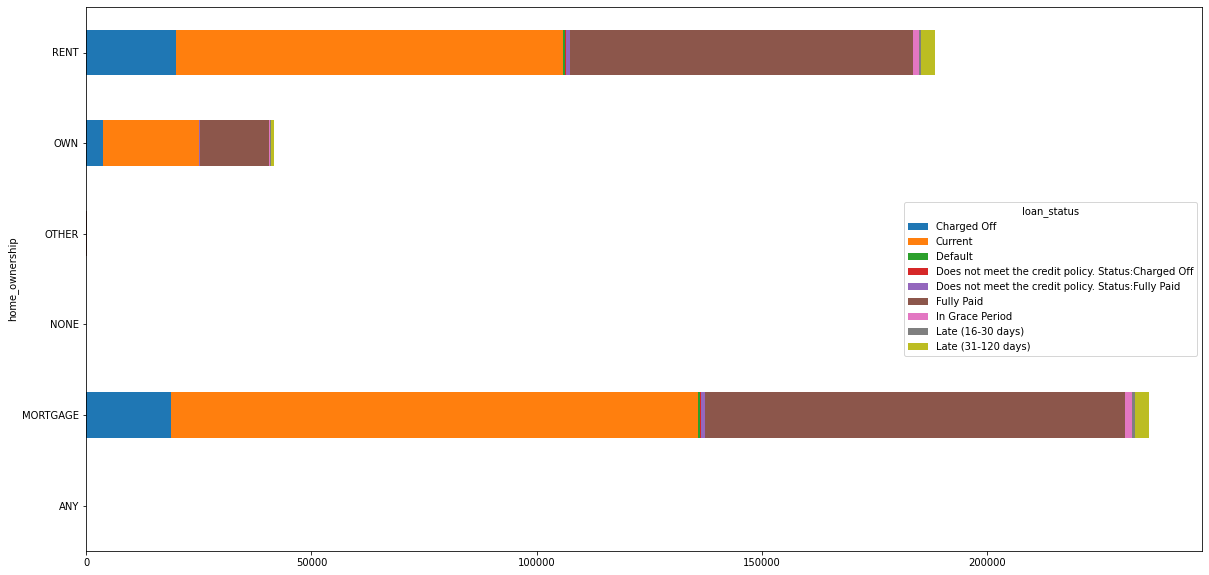

In [ ]:
print(pd.crosstab(df['home_ownership'], df['loan_status']))
# Nilai variabel home_ownership dan proporsi loan_status secara plot bar
pd.crosstab(df['home_ownership'], df['loan_status']).plot(kind='barh', stacked=True, figsize=(20,10))

loan_status  Charged Off  Current  Default  \
grade                                        
A                   2527    35191       30   
B                   9157    64009      149   
C                  11921    63351      258   
D                   9748    37460      212   
E                   5710    17229      130   
F                   2685     5697       37   
G                    727     1289       16   

loan_status  Does not meet the credit policy. Status:Charged Off  \
grade                                                              
A                                                            8     
B                                                           85     
C                                                          148     
D                                                          197     
E                                                          158     
F                                                           93     
G                                        

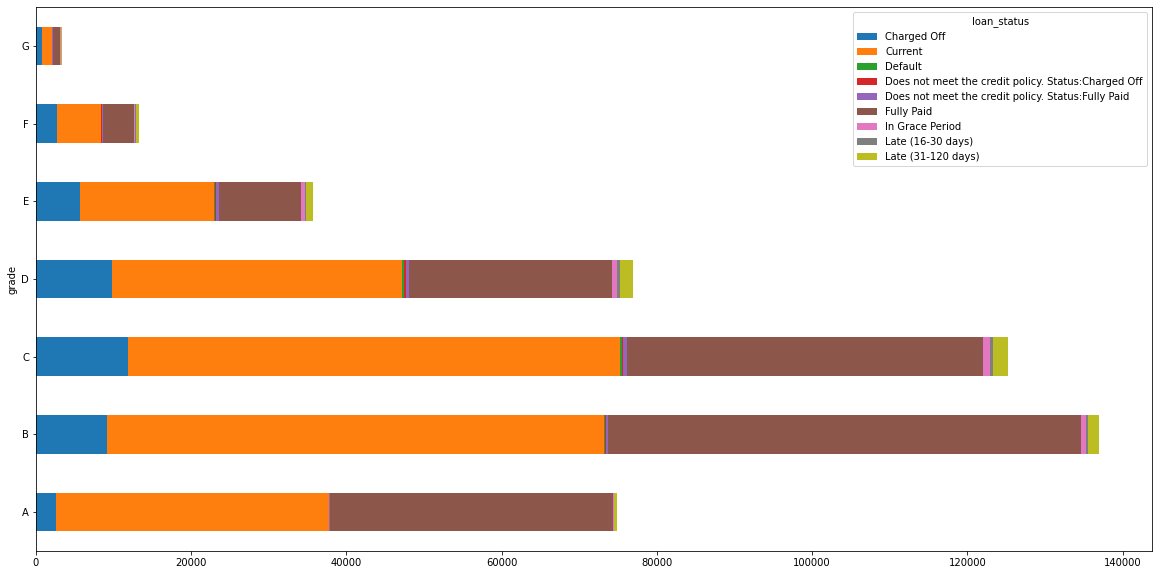

In [ ]:
print(pd.crosstab(df['grade'], df['loan_status']))
pd.crosstab(df['grade'], df['loan_status']).plot(kind='barh', stacked=True, figsize=(20,10))

loan_status  Charged Off  Current  Default  \
term                                         
 36 months         27455   149505      490   
 60 months         15020    74721      342   

loan_status  Does not meet the credit policy. Status:Charged Off  \
term                                                               
 36 months                                                 649     
 60 months                                                 112     

loan_status  Does not meet the credit policy. Status:Fully Paid  Fully Paid  \
term                                                                          
 36 months                                                1789       151101   
 60 months                                                 199        33638   

loan_status  In Grace Period  Late (16-30 days)  Late (31-120 days)  
term                                                                 
 36 months              1979                769                4216  
 60 months     

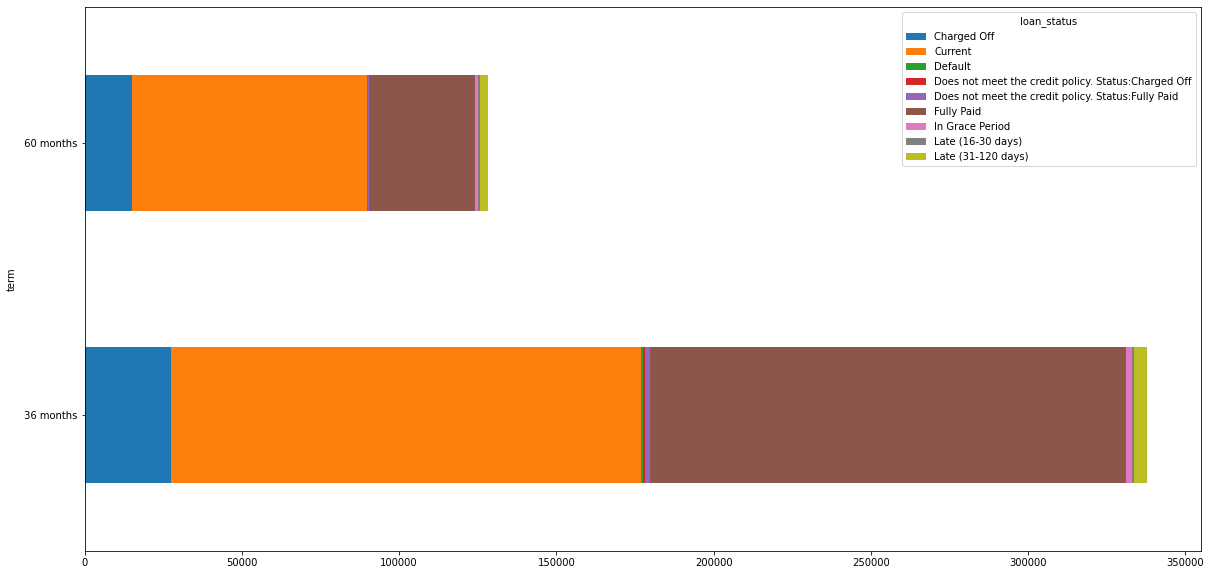

In [ ]:
print(pd.crosstab(df['term'], df['loan_status']))
pd.crosstab(df['term'], df['loan_status']).plot(kind='barh', stacked=True, figsize=(20,10))

##Mengecek Data Hilang

In [ ]:
# menampilkan missing value
def chek_missing(df):
    sum_nan = df.isna().sum().reset_index()
    sum_nan.columns = ['Kolom', 'Jumlah_NaN']
    sum_nan["Persentase"] = sum_nan.Jumlah_NaN/len(df)
    return sum_nan.sort_values("Persentase", ascending =  False)
missing = chek_missing(df)

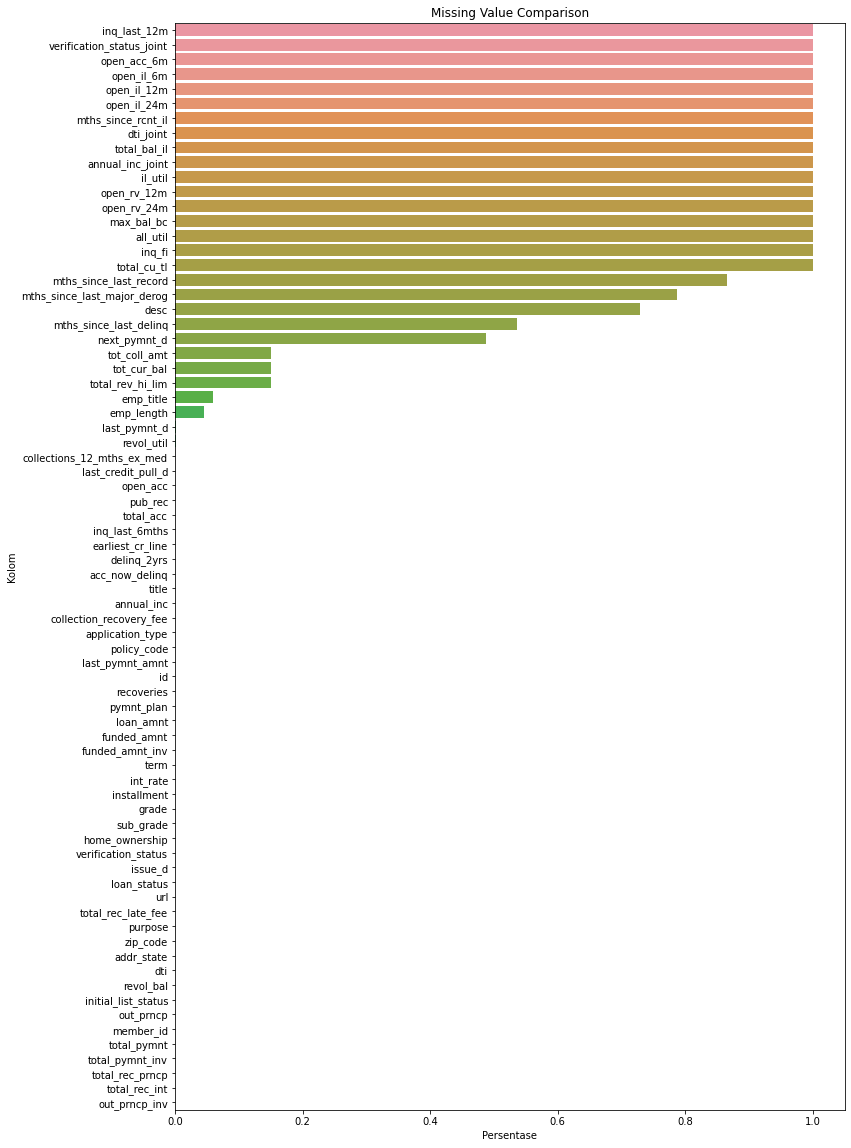

In [ ]:
plt.figure(figsize=(12,20))
sns.barplot(y = missing['Kolom'], x = missing['Persentase']).set_title("Missing Value Comparison");

In [ ]:
# Menampilkan kolom yang memiliki Missing Value lebih dari 70%

mis = missing[missing.Persentase < 0.7]
mis 

,Kolom,Jumlah_NaN,Persentase
28,mths_since_last_delinq,250351,0.536906
47,next_pymnt_d,227214,0.487286
57,tot_coll_amt,70276,0.150715
58,tot_cur_bal,70276,0.150715
70,total_rev_hi_lim,70276,0.150715
10,emp_title,27588,0.059166
11,emp_length,21008,0.045054
45,last_pymnt_d,376,0.000806
33,revol_util,340,0.000729
49,collections_12_mths_ex_med,145,0.000311


In [ ]:
to_fix_col = mis[mis.Persentase > 0].Kolom.tolist()

In [ ]:
# drop kolom yang memiliki missing value yang lebih dari 70% 
df2 = df.drop(missing[missing.Persentase > 0.7].Kolom.tolist(),1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 54 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          466285 non-null  int64  
 1   member_id                   466285 non-null  int64  
 2   loan_amnt                   466285 non-null  int64  
 3   funded_amnt                 466285 non-null  int64  
 4   funded_amnt_inv             466285 non-null  float64
 5   term                        466285 non-null  object 
 6   int_rate                    466285 non-null  float64
 7   installment                 466285 non-null  float64
 8   grade                       466285 non-null  object 
 9   sub_grade                   466285 non-null  object 
 10  emp_title                   438697 non-null  object 
 11  emp_length                  445277 non-null  object 
 12  home_ownership              466285 non-null  object 
 13  annual_inc    

## Merubah object menjadi int

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df2['term_fix']=label_encoder.fit_transform(df2['term'])
print(df2[['term', 'term_fix']].head())
df2.drop(["term"], axis=1, inplace=True)

         term  term_fix
0   36 months         0
1   60 months         1
2   36 months         0
3   36 months         0
4   60 months         1


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df2['grade_fix']=label_encoder.fit_transform(df2['grade'])
print(df2[['grade', 'grade_fix']].head())
df2.drop(["grade"], axis=1, inplace=True)

  grade  grade_fix
0     B          1
1     C          2
2     C          2
3     C          2
4     B          1


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df2['sub_grade_fix']=label_encoder.fit_transform(df2['sub_grade'])
print(df2[['sub_grade', 'sub_grade_fix']].head())
df2.drop(["sub_grade"], axis=1, inplace=True)

  sub_grade  sub_grade_fix
0        B2              6
1        C4             13
2        C5             14
3        C1             10
4        B5              9


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df2['emp_title_fix']=label_encoder.fit_transform(df2['emp_title'])
print(df2[['emp_title', 'emp_title_fix']].head())
df2.drop(["emp_title"], axis=1, inplace=True)

                  emp_title  emp_title_fix
0                       NaN         205475
1                     Ryder         131796
2                       NaN         205475
3       AIR RESOURCES BOARD           2257
4  University Medical Group         165724


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df2['emp_length_fix']=label_encoder.fit_transform(df2['emp_length'])
print(df2[['emp_length', 'emp_length_fix']].head())
df2.drop(["emp_length"], axis=1, inplace=True)

  emp_length  emp_length_fix
0  10+ years               1
1   < 1 year              10
2  10+ years               1
3  10+ years               1
4     1 year               0


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df2['home_ownership_fix']=label_encoder.fit_transform(df2['home_ownership'])
print(df2[['home_ownership', 'home_ownership_fix']].head())
df2.drop(["home_ownership"], axis=1, inplace=True)

  home_ownership  home_ownership_fix
0           RENT                   5
1           RENT                   5
2           RENT                   5
3           RENT                   5
4           RENT                   5


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df2['verification_status_fix']=label_encoder.fit_transform(df2['verification_status'])
print(df2[['verification_status', 'verification_status_fix']].head())
df2.drop(["verification_status"], axis=1, inplace=True)

  verification_status  verification_status_fix
0            Verified                        2
1     Source Verified                        1
2        Not Verified                        0
3     Source Verified                        1
4     Source Verified                        1


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df2['issue_d_fix']=label_encoder.fit_transform(df2['issue_d'])
print(df2[['issue_d', 'issue_d_fix']].head())
df2.drop(["issue_d"], axis=1, inplace=True)

  issue_d  issue_d_fix
0  Dec-11           19
1  Dec-11           19
2  Dec-11           19
3  Dec-11           19
4  Dec-11           19


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df2['loan_status_fix']=label_encoder.fit_transform(df2['loan_status'])
print(df2[['loan_status', 'loan_status_fix']].head())
df2.drop(["loan_status"], axis=1, inplace=True)

   loan_status  loan_status_fix
0   Fully Paid                5
1  Charged Off                0
2   Fully Paid                5
3   Fully Paid                5
4      Current                1


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df2['pymnt_plan_fix']=label_encoder.fit_transform(df2['pymnt_plan'])
print(df2[['pymnt_plan', 'pymnt_plan_fix']].head())
df2.drop(["pymnt_plan"], axis=1, inplace=True)

  pymnt_plan  pymnt_plan_fix
0          n               0
1          n               0
2          n               0
3          n               0
4          n               0


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df2['url_fix']=label_encoder.fit_transform(df2['url'])
print(df2[['url', 'url_fix']].head())
df2.drop(["url"], axis=1, inplace=True)

                                                 url  url_fix
0  https://www.lendingclub.com/browse/loanDetail....    21253
1  https://www.lendingclub.com/browse/loanDetail....    21217
2  https://www.lendingclub.com/browse/loanDetail....    21203
3  https://www.lendingclub.com/browse/loanDetail....    21181
4  https://www.lendingclub.com/browse/loanDetail....    20653


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df2['purpose_fix']=label_encoder.fit_transform(df2['purpose'])
print(df2[['purpose', 'purpose_fix']].head())
df2.drop(["purpose"], axis=1, inplace=True)

          purpose  purpose_fix
0     credit_card            1
1             car            0
2  small_business           11
3           other            9
4           other            9


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df2['title_fix']=label_encoder.fit_transform(df2['title'])
print(df2[['title', 'title_fix']].head())
df2.drop(["title"], axis=1, inplace=True)

                  title  title_fix
0              Computer       8851
1                  bike      49816
2  real estate business      60661
3              personel      60338
4              Personal      39313


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df2['zip_code_fix']=label_encoder.fit_transform(df2['zip_code'])
print(df2[['zip_code', 'zip_code_fix']].head())
df2.drop(["zip_code"], axis=1, inplace=True)

  zip_code  zip_code_fix
0    860xx           764
1    309xx           286
2    606xx           544
3    917xx           808
4    972xx           861


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df2['addr_state_fix']=label_encoder.fit_transform(df2['addr_state'])
print(df2[['addr_state', 'addr_state_fix']].head())
df2.drop(["addr_state"], axis=1, inplace=True)

  addr_state  addr_state_fix
0         AZ               3
1         GA              10
2         IL              14
3         CA               4
4         OR              36


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df2['earliest_cr_line_fix']=label_encoder.fit_transform(df2['earliest_cr_line'])
print(df2[['earliest_cr_line', 'earliest_cr_line_fix']].head())
df2.drop(["earliest_cr_line"], axis=1, inplace=True)

  earliest_cr_line  earliest_cr_line_fix
0           Jan-85                   261
1           Apr-99                    51
2           Nov-01                   495
3           Feb-96                   209
4           Jan-96                   272


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df2['initial_list_status_fix']=label_encoder.fit_transform(df2['initial_list_status'])
print(df2[['initial_list_status', 'initial_list_status_fix']].head())
df2.drop(["initial_list_status"], axis=1, inplace=True)

  initial_list_status  initial_list_status_fix
0                   f                        0
1                   f                        0
2                   f                        0
3                   f                        0
4                   f                        0


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df2['last_pymnt_d_fix']=label_encoder.fit_transform(df2['last_pymnt_d'])
print(df2[['last_pymnt_d', 'last_pymnt_d_fix']].head())
df2.drop(["last_pymnt_d"], axis=1, inplace=True)

  last_pymnt_d  last_pymnt_d_fix
0       Jan-15                40
1       Apr-13                 5
2       Jun-14                56
3       Jan-15                40
4       Jan-16                41


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df2['next_pymnt_d_fix']=label_encoder.fit_transform(df2['next_pymnt_d'])
print(df2[['next_pymnt_d', 'next_pymnt_d_fix']].head())
df2.drop(["next_pymnt_d"], axis=1, inplace=True)

  next_pymnt_d  next_pymnt_d_fix
0          NaN               100
1          NaN               100
2          NaN               100
3          NaN               100
4       Feb-16                33


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df2['last_credit_pull_d_fix']=label_encoder.fit_transform(df2['last_credit_pull_d'])
print(df2[['last_credit_pull_d', 'last_credit_pull_d_fix']].head())
df2.drop(["last_credit_pull_d"], axis=1, inplace=True)

  last_credit_pull_d  last_credit_pull_d_fix
0             Jan-16                      41
1             Sep-13                     100
2             Jan-16                      41
3             Jan-15                      40
4             Jan-16                      41


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df2['application_type_fix']=label_encoder.fit_transform(df2['application_type'])
print(df2[['application_type', 'application_type_fix']].head())
df2.drop(["application_type"], axis=1, inplace=True)

  application_type  application_type_fix
0       INDIVIDUAL                     0
1       INDIVIDUAL                     0
2       INDIVIDUAL                     0
3       INDIVIDUAL                     0
4       INDIVIDUAL                     0


In [ ]:
df2.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term_fix,grade_fix,sub_grade_fix,emp_title_fix,emp_length_fix,home_ownership_fix,verification_status_fix,issue_d_fix,loan_status_fix,pymnt_plan_fix,url_fix,purpose_fix,title_fix,zip_code_fix,addr_state_fix,earliest_cr_line_fix,initial_list_status_fix,last_pymnt_d_fix,next_pymnt_d_fix,last_credit_pull_d_fix,application_type_fix
0,1077501,1296599,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,NaN,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,171.62,0.0,1,0.0,NaN,NaN,NaN,0,1,6,205475,1,5,2,19,5,0,21253,1,8851,764,3,261,0,40,100,41,0
1,1077430,1314167,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,NaN,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,119.66,0.0,1,0.0,NaN,NaN,NaN,1,2,13,131796,10,5,1,19,0,0,21217,0,49816,286,10,51,0,5,100,100,0


## Menanganan Data Hilang

In [ ]:
df2_fix=df2
flt_col = df2_fix.columns[df2_fix.dtypes==float]
df2_fix[flt_col] = df2_fix[flt_col].fillna(df2_fix[flt_col].mean())

In [ ]:
df2_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 54 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          466285 non-null  int64  
 1   member_id                   466285 non-null  int64  
 2   loan_amnt                   466285 non-null  int64  
 3   funded_amnt                 466285 non-null  int64  
 4   funded_amnt_inv             466285 non-null  float64
 5   int_rate                    466285 non-null  float64
 6   installment                 466285 non-null  float64
 7   annual_inc                  466285 non-null  float64
 8   dti                         466285 non-null  float64
 9   delinq_2yrs                 466285 non-null  float64
 10  inq_last_6mths              466285 non-null  float64
 11  mths_since_last_delinq      466285 non-null  float64
 12  open_acc                    466285 non-null  float64
 13  pub_rec       

# Fitur Seleksi

In [ ]:
X = df2_fix.drop(['loan_status_fix'], axis=1) 
y = df2_fix.loan_status_fix 

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(15,'Score'))

              Specs         Score
1         member_id  8.810868e+11
0                id  8.287988e+11
17        out_prncp  2.005149e+09
18    out_prncp_inv  2.004419e+09
26  last_pymnt_amnt  1.602034e+09
21  total_rec_prncp  6.761935e+08
24       recoveries  3.904353e+08
19      total_pymnt  3.859449e+08
20  total_pymnt_inv  3.813675e+08
31      tot_cur_bal  1.438959e+08
44        title_fix  1.095138e+08
14        revol_bal  5.666811e+07
42          url_fix  5.611723e+07
7        annual_inc  5.120575e+07
22    total_rec_int  4.674778e+07


In [ ]:
df3 = df2_fix.copy()
df3.reset_index(inplace=True)
fix_df = df3.get(['out_prncp', 'out_prncp_inv', 'last_pymnt_amnt', 'total_rec_prncp', 'recoveries', 'total_pymnt', 'total_pymnt_inv', 'tot_cur_bal', 'title_fix', 'revol_bal', 'url_fix', 'annual_inc', 'total_rec_int', 'loan_status_fix'])

In [ ]:
fix_df.head()

,out_prncp,out_prncp_inv,last_pymnt_amnt,total_rec_prncp,recoveries,total_pymnt,total_pymnt_inv,tot_cur_bal,title_fix,revol_bal,url_fix,annual_inc,total_rec_int,loan_status_fix
0,0.0,0.0,171.62,5000.00,0.00,5861.071414,5831.78,138801.713385,8851,13648,21253,24000.0,861.07,5
1,0.0,0.0,119.66,456.46,117.08,1008.710000,1008.71,138801.713385,49816,1687,21217,30000.0,435.17,0
2,0.0,0.0,649.91,2400.00,0.00,3003.653644,3003.65,138801.713385,60661,2956,21203,12252.0,603.65,5
3,0.0,0.0,357.48,10000.00,0.00,12226.302210,12226.30,138801.713385,60338,5598,21181,49200.0,2209.33,5
4,766.9,766.9,67.79,2233.10,0.00,3242.170000,3242.17,138801.713385,39313,27783,20653,80000.0,1009.07,1


# Modeling

In [ ]:
Xn = fix_df.drop(['loan_status_fix'], axis=1) 
yn = fix_df.loan_status_fix 

In [ ]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.2) 

## Logistic Regression

In [ ]:
classifierlog2 =  LogisticRegression()
classifierlog2.fit(Xn_train, yn_train) # fit : untuk proses pelatihan
yn_predlog2 = classifierlog2.predict(Xn_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print("Accuracy:",metrics.accuracy_score(yn_test, yn_predlog2))

Accuracy: 0.9014658417062527


In [ ]:
## Evaluasi dengan Classification Report

# Menggunakan fungsi Classification Report dari sklearn
from sklearn.metrics import classification_report

# Kita akan cek hasil confusion matrix antara hasil sebenarnya dengan prediksi dari model ke data test
report = classification_report(yn_test, yn_predlog2)

# cek hasil matrix
print(report)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      0.48      0.63      8515
           1       0.92      0.97      0.94     44729
           2       0.00      0.00      0.00       154
           3       0.00      0.00      0.00       147
           4       0.00      0.00      0.00       367
           5       0.88      0.99      0.93     37039
           6       0.00      0.00      0.00       665
           7       0.00      0.00      0.00       262
           8       0.00      0.00      0.00      1379

    accuracy                           0.90     93257
   macro avg       0.30      0.27      0.28     93257
weighted avg       0.88      0.90      0.88     93257



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree

In [ ]:
classifierdt2 =  DecisionTreeClassifier()
classifierdt2.fit(Xn_train, yn_train) # fit : untuk proses pelatihan
yn_preddt2 = classifierdt2.predict(Xn_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(yn_test, yn_preddt2))

Accuracy: 0.9471567817965407


In [ ]:
## Evaluasi dengan Classification Report

# Menggunakan fungsi Classification Report dari sklearn
from sklearn.metrics import classification_report

# Kita akan cek hasil confusion matrix antara hasil sebenarnya dengan prediksi dari model ke data test
report = classification_report(yn_test, yn_preddt2)

# cek hasil matrix
print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8515
           1       0.96      0.96      0.96     44729
           2       0.15      0.16      0.16       154
           3       0.35      0.32      0.33       147
           4       0.22      0.26      0.24       367
           5       0.99      0.98      0.98     37039
           6       0.04      0.04      0.04       665
           7       0.01      0.01      0.01       262
           8       0.35      0.36      0.35      1379

    accuracy                           0.95     93257
   macro avg       0.45      0.45      0.45     93257
weighted avg       0.95      0.95      0.95     93257

